In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans

In [70]:
def weightedAvg(data):
    rdata = pd.DataFrame()
    for player in set(data.pid):
        p= data[data['pid'] == player]
        ser = len(p)
        p = p.drop(['pid', 'series_code'], axis = 1 )
        p = pd.DataFrame(p.mean(axis = 0))
        p = p.swapaxes('index', 'columns')

        p.insert(0, 'pid', player)
        p.insert(0, 'series_played', ser)
        rdata = rdata.append(p)
    return rdata

In [71]:
df = pd.read_csv('playerIR.csv')[:]
df = weightedAvg(df)

In [72]:
df.shape

(1360, 6)

In [116]:
df = df.reset_index().drop(['index'], axis=1)
df.head()
df.shape

(1360, 7)

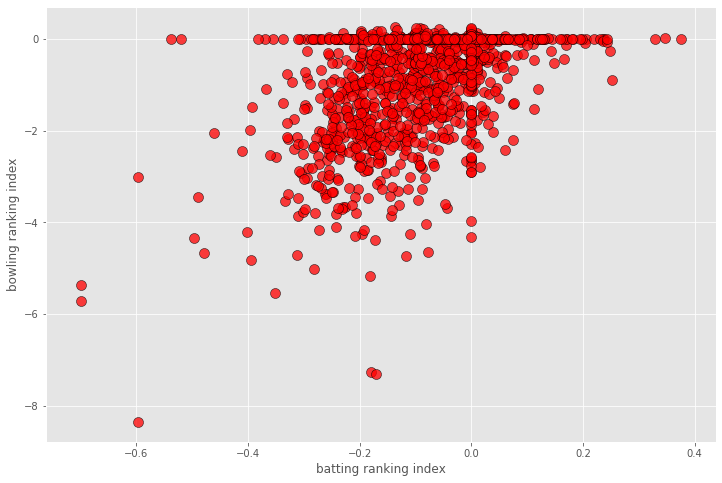

In [163]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(df.batRI, df.bowlRI, s = 100, c = 'red', edgecolor = 'black', linewidth = .6, alpha = .75)
plt.xlabel('batting ranking index')
plt.ylabel('bowling ranking index')
plt.style.use('ggplot')

# plt.figure(num=None, figsize=(4000, 4000))
plt.show()

In [164]:
kmeans = KMeans(n_clusters=20)

In [165]:
kmeans.fit(df[['batRI', 'bowlRI']])
df['clusterRI'] = kmeans.predict(df[['batRI', 'bowlRI']])


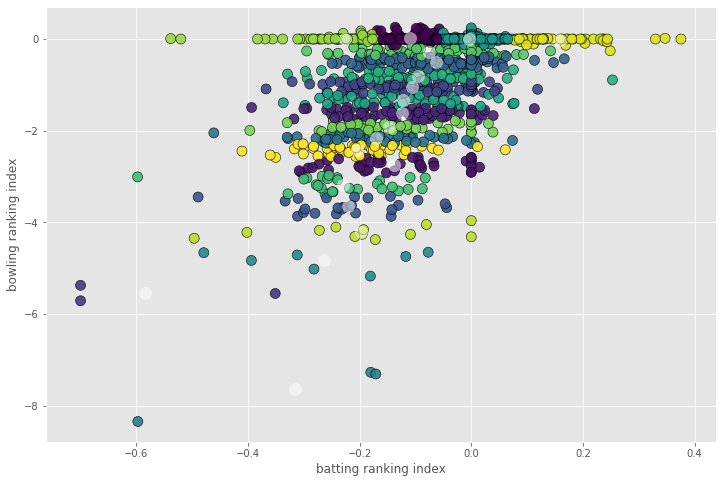

In [166]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(df.batRI, df.bowlRI, c = df['clusterRI'] , s=100 ,edgecolor = 'black', linewidth = .6 ,alpha = .9)
plt.xlabel('batting ranking index')
plt.ylabel('bowling ranking index')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'white', s=150, alpha=.5);

# plt.xscale('linear')
# plt.yscale('linear')
plt.show()



In [115]:
# df.to_csv('clustered1tttt.csv', index=False)

In [167]:
df[df['clusterRI'] != 1]

,series_played,pid,batAGR,batRI,bowlAGR,bowlRI,clusterRI
0,32,3.0,32.794977,0.081171,-134.296390,-0.339081,14
1,2,6.0,-37.275862,-0.123684,-78.290755,-0.272888,14
2,16,9.0,-21.938038,-0.055445,-143.065645,-0.479007,6
3,2,12.0,0.000000,0.000000,-653.023150,-1.635896,2
4,1,13.0,0.000000,0.000000,5.835722,0.018877,10
5,76,15.0,-8.566277,-0.020877,-9.135865,-0.036867,10
6,49,18.0,-58.952911,-0.179639,-432.631275,-1.450684,11
7,3,21.0,-44.971429,-0.156929,0.000000,0.000000,0
8,2,22.0,5.227273,0.018745,0.000000,0.000000,10
9,34,23.0,-58.864979,-0.174150,-446.494932,-1.377914,11
